In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import glob
# import ffmpeg
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### 1. List audio files

In [2]:
# Read mp3
audio_files = []
for fn_mp3 in glob.glob("audio/*"):
    audio_files.append(fn_mp3)
audio_files

['audio\\119266.mp3',
 'audio\\119578.mp3',
 'audio\\179796.mp3',
 'audio\\26190.mp3',
 'audio\\349230.mp3',
 'audio\\423062.mp3',
 'audio\\439759.mp3',
 'audio\\451894.mp3',
 'audio\\483745.mp3',
 'audio\\86169.mp3']

### 2. Choose audio test file

In [3]:
audio_file = audio_files[3]

### 3. Amplitude vs Time

MP3 file:  Fs = 22050, x.shape = (596160,), x.dtype = float32


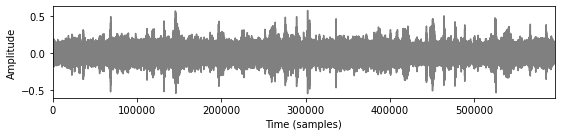

In [4]:
def print_plot_play(x, Fs, text=''):
    """1. Prints information about an audio singal, 2. plots the waveform, and 3. Creates player
    Args: 
        x: Input signal
        Fs: Sampling rate of x    
        text: Text to print
    """
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(8, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))


x, Fs = librosa.load(audio_file)
print_plot_play(x=x, Fs=Fs, text='MP3 file: ')

### 4. Spectogram with Short Fourier Transform
  
https://librosa.org/doc/latest/generated/librosa.stft.html#librosa.stft

<Figure size 432x288 with 0 Axes>

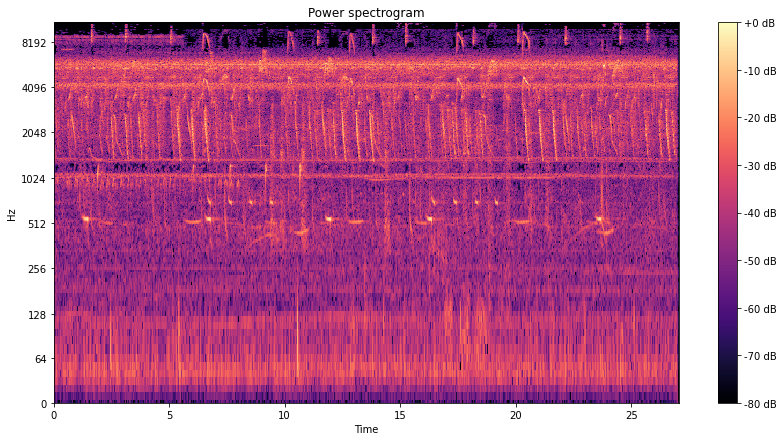

<Figure size 432x288 with 0 Axes>

In [5]:
y, sr =librosa.load(audio_file)
S = np.abs(librosa.stft(y))
# print(S[0])
# sgram = librosa.stft(S)
fig, ax = plt.subplots(figsize=(14, 7))
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')

fig.colorbar(img, ax=ax, format="%+2.0f dB")

plt.figure()

### 5. Onset  
  
https://musicinformationretrieval.com/onset_detection.html

<Figure size 432x288 with 0 Axes>

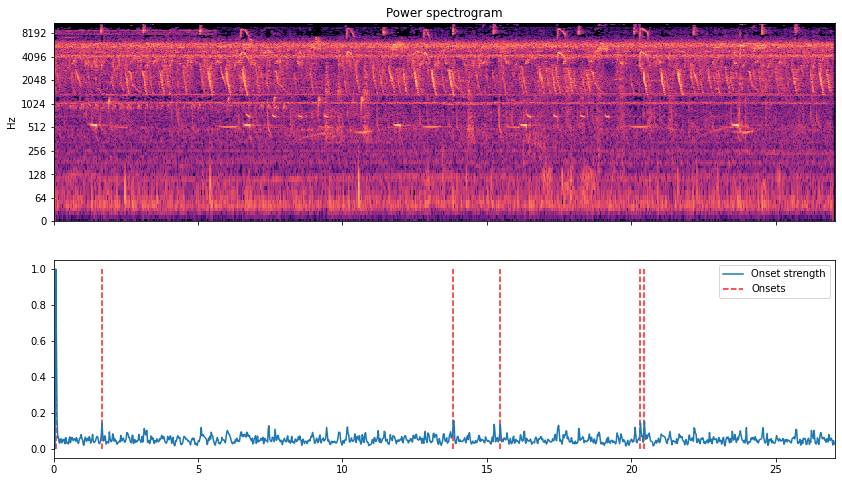

<Figure size 432x288 with 0 Axes>

In [6]:
o_env = librosa.onset.onset_strength(y, sr=sr)

times = librosa.times_like(o_env, sr=sr)

onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)



D = np.abs(librosa.stft(y))

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(14, 8))

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),

                         x_axis='time', y_axis='log', ax=ax[0])

ax[0].set(title='Power spectrogram')

ax[0].label_outer()

ax[1].plot(times, o_env, label='Onset strength')

ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,

           linestyle='--', label='Onsets')

ax[1].legend()

plt.figure()

## MFCC, Mel Spectrogram, Chromagram

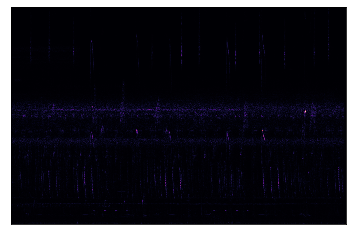

In [8]:
sgram = librosa.stft(x)
librosa.display.specshow(sgram)

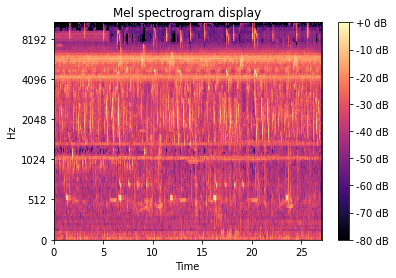

In [9]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=x, sr=Fs)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram display')
fig.colorbar(img, ax=ax, format="%+2.f dB")

[Text(0.5, 1.0, 'Pitch axis decoration')]

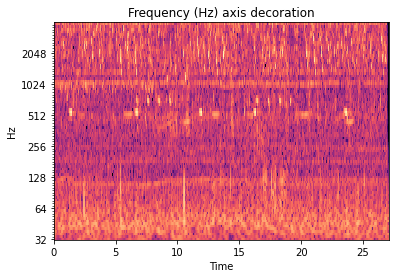

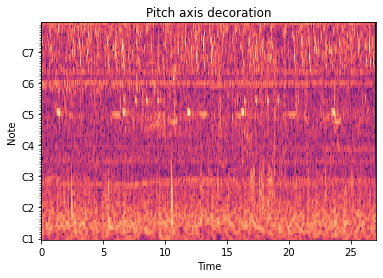

In [10]:
C = librosa.cqt(y=x, sr=Fs)
C_db = librosa.amplitude_to_db(np.abs(C), ref=np.max)

fig, ax = plt.subplots()
librosa.display.specshow(C_db, y_axis='cqt_hz', x_axis='time', ax=ax)
ax.set(title='Frequency (Hz) axis decoration')

fig, ax = plt.subplots()
librosa.display.specshow(C_db, y_axis='cqt_note', x_axis='time', ax=ax)
ax.set(title='Pitch axis decoration')

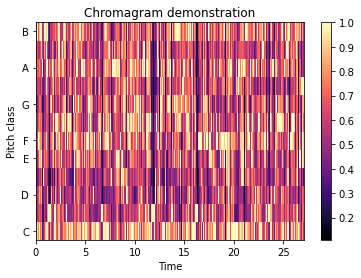

In [11]:
chroma = librosa.feature.chroma_cqt(y=x, sr=Fs)
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='Chromagram demonstration')
fig.colorbar(img, ax=ax)

In [12]:
D = librosa.stft(x)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

[(1.0, 3.0)]

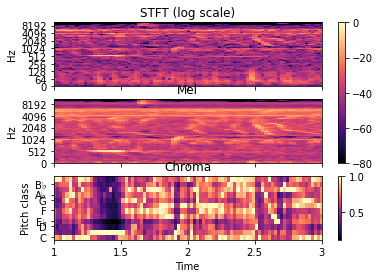

In [13]:
# Construct a subplot grid with 3 rows and 1 column, sharing the x-axis)
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)

# On the first subplot, show the original spectrogram
img1 = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='STFT (log scale)')

# On the second subplot, show the mel spectrogram
img2 = librosa.display.specshow(M_db, x_axis='time', y_axis='mel', ax=ax[1])
ax[1].set(title='Mel')

# On the third subplot, show the chroma features
img3 = librosa.display.specshow(chroma, x_axis='time', y_axis='chroma',
                                key='Eb:maj', ax=ax[2])
ax[2].set(title='Chroma')

# To eliminate redundant axis labels, we'll use "label_outer" on all subplots:
for ax_i in ax:
    ax_i.label_outer()

# And we can share colorbars:
fig.colorbar(img1, ax=[ax[0], ax[1]])

# Or have individual colorbars:
fig.colorbar(img3, ax=[ax[2]])

# We can then even do fancy things like zoom into a particular time and frequency
# region.  Since the axes are shared, this will apply to all three subplots at once.
ax[0].set(xlim=[1, 3])  # Zoom to seconds 1-3